# Programming Assignment: Gradient boosting

In this assignment we will work work with **gradient boosting** method, adjust its hyperparameters and use **log-loss**.  
Let's take a look at original five tasks presented in Russian.

**Tasks will be duplicated in english further in this assignment**

1.  Загрузите выборку из файла gbm-data.csv с помощью pandas и преобразуйте ее в массив numpy (параметр values у датафрейма). В первой колонке файла с данными записано, была или нет реакция. Все остальные колонки (d1 - d1776) содержат различные характеристики молекулы, такие как размер, форма и т.д. Разбейте выборку на обучающую и тестовую, используя функцию train_test_split с параметрами test_size = 0.8 и random_state = 241. 
2. Обучите GradientBoostingClassifier с параметрами n_estimators=250, verbose=True, random_state=241 и для каждого значения learning_rate из списка [1, 0.5, 0.3, 0.2, 0.1] проделайте следующее:

    Используйте метод staged_decision_function для предсказания качества на обучающей и тестовой выборке на каждой итерации.
    Преобразуйте полученное предсказание с помощью сигмоидной функции по формуле 1 / (1 + e^{−y_pred}), где y_pred — предсказанное значение.
    Вычислите и постройте график значений log-loss (которую можно посчитать с помощью функции sklearn.metrics.log_loss) на обучающей и тестовой выборках, а также найдите минимальное значение метрики и номер итерации, на которой оно достигается.

3. Как можно охарактеризовать график качества на тестовой выборке, начиная с некоторой итерации: переобучение (overfitting) или недообучение (underfitting)? В ответе укажите одно из слов overfitting либо underfitting.

4. Приведите минимальное значение log-loss на тестовой выборке и номер итерации, на котором оно достигается, при learning_rate = 0.2.

5. На этих же данных обучите RandomForestClassifier с количеством деревьев, равным количеству итераций, на котором достигается наилучшее качество у градиентного бустинга из предыдущего пункта, c random_state=241 и остальными параметрами по умолчанию. Какое значение log-loss на тесте получается у этого случайного леса? (Не забывайте, что предсказания нужно получать с помощью функции predict_proba. В данном случае брать сигмоиду от оценки вероятности класса не нужно)

In [1]:
import numpy as np

from sklearn.metrics import log_loss
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

import pandas

## Task №1
*Ru*: Загрузите выборку из файла gbm-data.csv с помощью pandas и преобразуйте ее в массив numpy (параметр values у датафрейма). В первой колонке файла с данными записано, была или нет реакция. Все остальные колонки (d1 - d1776) содержат различные характеристики молекулы, такие как размер, форма и т.д. Разбейте выборку на обучающую и тестовую, используя функцию *train_test_split* с параметрами *test_size = 0.8* и *random_state = 241*.

*En:* Load a sample from the gbm-data.csv file using pandas and convert it to a numpy array (use the values method of the dataframe). The first table's column records whether there was a reaction or not. All other columns (d1 - d1776) contain various characteristics of the molecule, such as size, shape, etc. Split the sample into training and test using the *train_test_split* function with the *test_size = 0.8* and *random_state = 241* parameters. 


In [2]:
df = pandas.read_csv('gbm-data.csv')#, header=None)
df

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,...,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,...,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,...,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,...,0,0,0,0,0,0,0,0,0,0


In [3]:
'''
#I didn't use it in final version of assigment because it slows down training
X = df.loc[:,'D1':].values
y = df['Activity'].values
'''
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,'D1':], df['Activity'], train_size=0.8, test_size=0.2 ,random_state = 241)

In [4]:
#X_train, X_test, y_train, y_test

## Task №2
*Ru*: Обучите GradientBoostingClassifier с параметрами n_estimators=250, verbose=True, random_state=241 и для каждого значения learning_rate из списка [1, 0.5, 0.3, 0.2, 0.1] проделайте следующее:

* Используйте метод staged_decision_function для предсказания качества на обучающей и тестовой выборке на каждой итерации. Преобразуйте полученное предсказание с помощью сигмоидной функции по формуле $\frac{1}{(1 + e^{−y\_pred})}$, где y_pred — предсказанное значение.

* Вычислите и постройте график значений log-loss (которую можно посчитать с помощью функции sklearn.metrics.log_loss) на обучающей и тестовой выборках, а также найдите минимальное значение метрики и номер итерации, на которой оно достигается.

*En:* Train the GradientBoostingClassifier with the parameters n_estimators = 250, verbose = True, random_state = 241 and for each learning_rate from the list [1, 0.5, 0.3, 0.2, 0.1]. Also, do the following tasks: 

* Use the staged_decision_function method to predict the quality of the training and test set at each iteration. Convert the resulting prediction using a sigmoid function using the formula $ \ frac {1} {(1 + e ^ {- y \ _pred})} $, where y_pred is the predicted value. 

* Calculate and plot the log-loss values (which can be calculated using the sklearn.metrics.log_loss function) on the training and test samples, and also find the minimum metric value and the iteration number at which it is achieved. 

In [5]:
def sigmoid(y_pred):
    return 1/(1 + np.exp(-y_pred))


Learing rate is: 1
      Iter       Train Loss   Remaining Time 
         1           1.0270           55.53s
         2           0.9644           53.94s
         3           0.9325           53.11s
         4           0.9000           52.40s
         5           0.8660           52.33s
         6           0.8448           51.49s
         7           0.8272           51.24s
         8           0.8124           50.70s
         9           0.8022           50.50s
        10           0.7905           50.07s
        20           0.6253           47.68s
        30           0.5217           45.36s
        40           0.4362           43.24s
        50           0.3711           41.14s
        60           0.3055           39.06s
        70           0.2474           36.99s
        80           0.2092           34.91s
        90           0.1700           32.86s
       100           0.1460           30.80s
       200           0.0347           10.28s
min loss on train set 0.0096880581

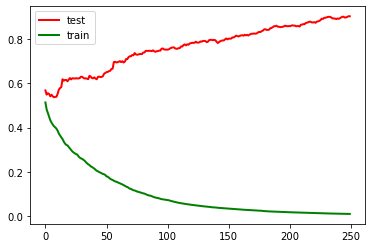


Learing rate is: 0.5
      Iter       Train Loss   Remaining Time 
         1           1.1287           52.29s
         2           1.0404           53.32s
         3           0.9955           52.69s
         4           0.9536           52.89s
         5           0.9304           51.94s
         6           0.9055           51.65s
         7           0.8859           51.38s
         8           0.8758           51.12s
         9           0.8603           50.61s
        10           0.8402           50.40s
        20           0.7229           47.61s
        30           0.6306           45.54s
        40           0.5724           43.21s
        50           0.5021           41.16s
        60           0.4528           39.05s
        70           0.4090           36.98s
        80           0.3651           34.94s
        90           0.3295           32.87s
       100           0.3028           30.81s
       200           0.1334           10.28s
min loss on train set 0.04545875

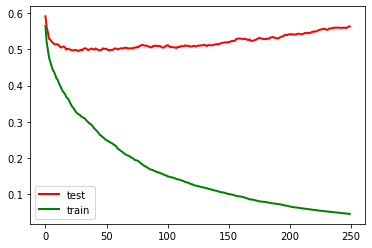


Learing rate is: 0.3
      Iter       Train Loss   Remaining Time 
         1           1.2098           52.29s
         2           1.1164           52.08s
         3           1.0618           51.87s
         4           1.0240           51.66s
         5           0.9976           51.45s
         6           0.9739           51.65s
         7           0.9548           51.03s
         8           0.9378           50.82s
         9           0.9239           50.61s
        10           0.9117           50.40s
        20           0.8178           47.61s
        30           0.7517           45.17s
        40           0.6877           43.00s
        50           0.6416           40.84s
        60           0.5860           38.83s
        70           0.5500           36.75s
        80           0.5086           34.70s
        90           0.4820           32.62s
       100           0.4507           30.57s
       200           0.2466           10.18s
min loss on train set 0.09678624

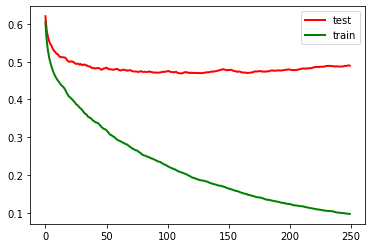


Learing rate is: 0.2
      Iter       Train Loss   Remaining Time 
         1           1.2599           52.29s
         2           1.1801           52.08s
         3           1.1231           51.87s
         4           1.0833           51.66s
         5           1.0516           51.45s
         6           1.0273           51.24s
         7           1.0062           51.03s
         8           0.9885           50.82s
         9           0.9708           50.61s
        10           0.9566           50.40s
        20           0.8637           47.84s
        30           0.8027           45.47s
        40           0.7553           43.21s
        50           0.7094           41.00s
        60           0.6676           38.92s
        70           0.6383           36.77s
        80           0.6119           34.70s
        90           0.5768           32.68s
       100           0.5540           30.59s
       200           0.3619           10.18s
min loss on train set 0.15287307

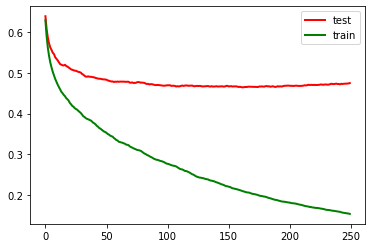


Learing rate is: 0.1
      Iter       Train Loss   Remaining Time 
         1           1.3166           52.29s
         2           1.2648           53.32s
         3           1.2219           52.69s
         4           1.1856           52.28s
         5           1.1556           51.94s
         6           1.1298           51.65s
         7           1.1077           51.38s
         8           1.0882           51.12s
         9           1.0707           50.88s
        10           1.0555           50.64s
        20           0.9613           48.19s
        30           0.9048           45.83s
        40           0.8720           43.47s
        50           0.8398           41.24s
        60           0.8114           39.11s
        70           0.7848           36.98s
        80           0.7647           34.85s
        90           0.7438           32.75s
       100           0.7255           30.66s
       200           0.5662           10.19s
min loss on train set 0.25439425

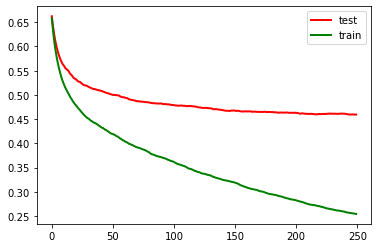

In [6]:
learning_rates =  [1, 0.5, 0.3, 0.2, 0.1]
dict_train = {}
dict_test = {}
for learning_rate in learning_rates:
    print("\nLearing rate is:", learning_rate)
    model = GradientBoostingClassifier(learning_rate=learning_rate, n_estimators=250, verbose=True, random_state=241)
    model.fit(X_train, y_train)
    
    scores_train = []
    for x in model.staged_decision_function(X_train):
        scores_train.append(log_loss(y_train, [1.0 / (1.0 + np.exp(-i)) for i in x]))
    print("min loss on train set", min(scores_train))
    dict_train[learning_rate] = scores_train
    dict_train[str(learning_rate) + '_min'] = min(scores_train)
        
    scores_test = []
    for x in model.staged_decision_function(X_test):
        scores_test.append(log_loss(y_test, [1.0 / (1.0 + np.exp(-i)) for i in x]))
    print("min loss on test set", min(scores_test))
    dict_test[learning_rate] = scores_test
    dict_test[str(learning_rate) + '_min'] = min(scores_test)
    
    plt.figure()
    plt.plot(scores_test, 'r', linewidth=2)
    plt.plot(scores_train, 'g', linewidth=2)
    plt.legend(['test', 'train'])    
    plt.show()

## Task №3
*Ru*: Как можно охарактеризовать график качества на тестовой выборке, начиная с некоторой итерации: переобучение (overfitting) или недообучение (underfitting)? В ответе укажите одно из слов overfitting либо underfitting.

*En:* How can you characterize the quality graph on a test sample, starting with some iteration: overfitting or underfitting? In the answer, indicate one of the words overfitting or underfitting. 

**Overfitting** as model's performance is extremely good at test data, but just awful in the test set.

## Task №4
*Ru*: Приведите минимальное значение log-loss на тестовой выборке и номер итерации, на котором оно достигается, при learning_rate = 0.2.


*En:* Give the minimum log-loss value on the test sample and the iteration number at which it is reached, for learning_rate = 0.2. 

In [7]:
min_value = dict_test[str(0.2)+'_min']
n_best = dict_test[0.2].index(min_value) + 1
print(n_best, min_value)

162 0.46469323454306777


In [8]:
dict_train[0.2]

[0.629932121858321,
 0.5900668220422007,
 0.5615652136069578,
 0.5416691202876256,
 0.5258224204793085,
 0.5136646770313722,
 0.5030990334700776,
 0.4942665511594723,
 0.48542363613651224,
 0.4782843006498428,
 0.4716234426444464,
 0.4658573599274083,
 0.45981058024412863,
 0.45391929207638393,
 0.45040269644788883,
 0.44606208662299096,
 0.44291370451307155,
 0.43822058529972013,
 0.4353055776694225,
 0.431868808063336,
 0.42628611615104295,
 0.4228462489611825,
 0.4188710046451507,
 0.41694830214585826,
 0.41335586569752936,
 0.41125029341432096,
 0.4096158198057271,
 0.40656358235851725,
 0.4039107830965154,
 0.4013426559900901,
 0.39723880731957933,
 0.3935937901360619,
 0.3916494309597092,
 0.38882925740084456,
 0.38717415345135214,
 0.38598975764682547,
 0.3844864071984477,
 0.38329114580951923,
 0.38080060787828285,
 0.37767424715168424,
 0.37603584745265994,
 0.3736419924224834,
 0.369907444883936,
 0.3678814743760865,
 0.3645481664153126,
 0.3628571092414219,
 0.36046772615745

## Task №5
*Ru*: На этих же данных обучите RandomForestClassifier с количеством деревьев, равным количеству итераций, на котором достигается наилучшее качество у градиентного бустинга из предыдущего пункта, c random_state=241 и остальными параметрами по умолчанию. Какое значение log-loss на тесте получается у этого случайного леса? (Не забывайте, что предсказания нужно получать с помощью функции predict_proba. В данном случае брать сигмоиду от оценки вероятности класса не нужно)

*En:* Train the RandomForestClassifier on the same data.  
Use the number of trees equal to the number of iterations, at which the best quality is achieved for the gradient boosting from the previous paragraph, with random_state = 241 and other default parameters. What is the test log-loss value for this random forest? (Do not forget that predictions must be obtained using the predict_proba function. In this case, you do not need to take the sigmoid from the class probability estimate) 

In [9]:
RFC = RandomForestClassifier(n_estimators=n_best, random_state=241)
RFC.fit(X_train, y_train)
y_pred = RFC.predict_proba(X_test)[:, 1]
log_loss(y_test, y_pred)

0.45844561841672754